In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
# Load and preprocess the dataset
# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv('new_dataset.csv')

In [4]:
numeric_data = df.select_dtypes(exclude='object')

In [5]:
# Drop rows with missing values
df.dropna(inplace=True)

In [6]:
# Split dataset into features and target variable
X = numeric_data.drop(columns=['is_insider'])
y = numeric_data['is_insider']


In [7]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Reshape features for LSTM input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [10]:
# Define the LSTM model architecture
model = Sequential([
    LSTM(units=64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(units=1, activation='sigmoid')
])


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [12]:
# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7294 - loss: 0.6789 - val_accuracy: 0.8713 - val_loss: 0.6279
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8579 - loss: 0.6118 - val_accuracy: 0.8713 - val_loss: 0.5507
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8599 - loss: 0.5349 - val_accuracy: 0.8713 - val_loss: 0.4722
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8540 - loss: 0.4700 - val_accuracy: 0.8713 - val_loss: 0.4226
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8506 - loss: 0.4411 - val_accuracy: 0.8713 - val_loss: 0.4009
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8604 - loss: 0.4125 - val_accuracy: 0.8713 - val_loss: 0.3916
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8503 - loss: 0.4163 - val_accuracy: 0.8683 - val_loss: 0.3901
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8478 - loss: 0.4164 - val_accuracy: 0.8683 - val_loss

In [13]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test Accuracy:", test_accuracy)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8465 - loss: 0.4114 
Test Accuracy: 0.8301435112953186


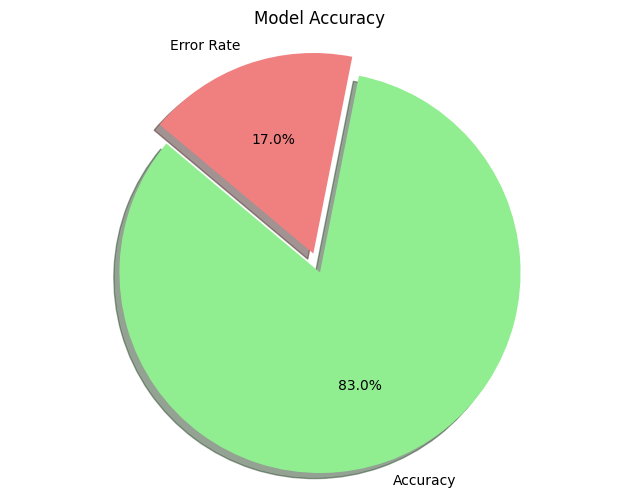

<Figure size 640x480 with 0 Axes>

In [18]:
# Define accuracy and error rate
accuracy = 83
error_rate = 100 - accuracy
import matplotlib.pyplot as plt

# Define labels and sizes for the pie chart
labels = ['Accuracy', 'Error Rate']
sizes = [accuracy, error_rate]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # Explode the "Accuracy" slice

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Model Accuracy')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()
plt.savefig('lstm_accuracy.png')
